# Prediction of Knee Osteporosis by DL

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

import cv2
from PIL import Image
import shutil

## 1. Load Dataset

In [2]:
def copy_files_to_new_directory(original_dirs, target_dir):
    # Ensure the target directory exists
    os.makedirs(target_dir, exist_ok=True)

    # Loop through each original directory
    for original_dir in original_dirs:
        # Loop through each file in the original directory
        for file_name in os.listdir(original_dir):
            # Construct full file path
            full_file_name = os.path.join(original_dir, file_name)
            if os.path.isfile(full_file_name):
                target_file_name = file_name
                target_file_path = os.path.join(target_dir, target_file_name)
                
                # Check for duplicate filenames and modify if necessary
                counter = 1
                while os.path.exists(target_file_path):
                    base_name, extension = os.path.splitext(file_name)
                    target_file_name = f"{base_name}_{counter}{extension}"
                    target_file_path = os.path.join(target_dir, target_file_name)
                    counter += 1

                # Copy the file to the new directory
                shutil.copy(full_file_name, target_file_path)
                print(f"Copied: {full_file_name} to {target_file_path}")

In [3]:
original_healthy_dirs = [
    r'datasets/1-osteoporosis-372/normal',
    r'datasets/2-osteoporosis-372/normal',
    r'datasets/3-osteoporosis-744/normal'
]

original_osteoporosis_dirs = [
    r'datasets/1-osteoporosis-372/osteoporosis',
    r'datasets/2-osteoporosis-372/osteoporosis',
    r'datasets/3-osteoporosis-744/osteoporosis'
]

healthy_dir = r'working/1-original-dataset/normal'
osteoporosis_dir = r'working/1-original-dataset/osteoporosis'

In [4]:
copy_files_to_new_directory(original_healthy_dirs, healthy_dir)
copy_files_to_new_directory(original_osteoporosis_dirs, osteoporosis_dir)

Copied: datasets/1-osteoporosis-372/normal\2.jpg to working/1-original-dataset/normal\2.jpg
Copied: datasets/1-osteoporosis-372/normal\3.png to working/1-original-dataset/normal\3.png
Copied: datasets/1-osteoporosis-372/normal\4.png to working/1-original-dataset/normal\4.png
Copied: datasets/1-osteoporosis-372/normal\5.png to working/1-original-dataset/normal\5.png
Copied: datasets/2-osteoporosis-372/normal\Normal.jpg to working/1-original-dataset/normal\Normal.jpg
Copied: datasets/2-osteoporosis-372/normal\Normal_2.jpg to working/1-original-dataset/normal\Normal_2.jpg
Copied: datasets/2-osteoporosis-372/normal\Normal_3.jpg to working/1-original-dataset/normal\Normal_3.jpg
Copied: datasets/2-osteoporosis-372/normal\Normal_4.jpg to working/1-original-dataset/normal\Normal_4.jpg
Copied: datasets/3-osteoporosis-744/normal\2.jpg to working/1-original-dataset/normal\2_1.jpg
Copied: datasets/3-osteoporosis-744/normal\3.png to working/1-original-dataset/normal\3_1.png
Copied: datasets/3-osteo

## 2. Create Dataframe

In [5]:
filepaths = []
labels = []

for d in [healthy_dir, osteoporosis_dir]:
    flist=os.listdir(d)
    
    for f in flist:
        fpath=os.path.join(d,f)
        filepaths.append(fpath)
        
        if d == osteoporosis_dir:
            labels.append('Osteoporosis')
        else:
            labels.append('Normal')
          
Fseries = pd.Series(filepaths, name="filepaths")
Lseries = pd.Series(labels, name="labels")
data = pd.concat([Fseries, Lseries], axis=1)
df = pd.DataFrame(data)
# print(df.head())
print(df["labels"].value_counts())

Normal          12
Osteoporosis    12
Name: labels, dtype: int64


In [6]:
filepaths = []
labels = []

for d in [healthy_dir, osteoporosis_dir]:
    flist=os.listdir(d)
    
    for f in flist:
        fpath=os.path.join(d,f)
        filepaths.append(fpath)
        
        if d == osteoporosis_dir:
            labels.append('Osteoporosis')
        else:
            labels.append('Normal')
            
Fseries = pd.Series(filepaths, name="filepaths")
Lseries = pd.Series(labels, name="labels")
data = pd.concat([Fseries, Lseries], axis=1)
df = pd.DataFrame(data)
# print(df.head())
print(df["labels"].value_counts())

Normal          12
Osteoporosis    12
Name: labels, dtype: int64


In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming you have a DataFrame `df` with a column 'label'
label_encoder = LabelEncoder()
df['encoded_labels'] = label_encoder.fit_transform(df['labels'])

By adding these additional fields, we have a more comprehensive dataset that can help us better understand and analyze our images:  

- filepaths: Paths to the image files.  
- labels: Original labels of the images.  
- width: Width of the images.  
- height: Height of the images.  
- encoded_labels: Numerical encoding of the labels.  
- aspect_ratio: Aspect ratio (width/height) of the images.  
- zero_pixel_percentage: Percentage of zero (black) pixels in the images.  
- mean_pixel_value: Mean pixel value of the images.  
- std_pixel_value: Standard deviation of the pixel values.  
- file_size: Size of the image files on disk.  
- image_format: Format of the image files (e.g., JPEG, PNG).  
- original_vs_processed: Flag indicating whether the image is original or processed.

In [8]:
import os
import cv2
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Function to calculate zero pixel percentage
def calculate_zero_pixel_percentage(image):
    total_pixels = image.size
    zero_pixels = np.sum(image == 0)
    zero_pixel_percentage = (zero_pixels / total_pixels) * 100
    return zero_pixel_percentage

# Function to calculate mean and standard deviation of pixel values
def calculate_pixel_stats(image):
    mean_pixel_value = np.mean(image)
    std_pixel_value = np.std(image)
    return mean_pixel_value, std_pixel_value

# Function to get file size
def get_file_size(filepath):
    return os.path.getsize(filepath)

# Initialize dataframe
data = {
    'filepaths': [],
    'labels': [],
    'width': [],
    'height': [],
    'encoded_labels': [],
    'aspect_ratio': [],
    'zero_pixel_percentage': [],
    'mean_pixel_value': [],
    'std_pixel_value': [],
    'file_size': [],
    'image_format': [],
    'original_vs_processed': []
}

# Assuming you have a list of filepaths and labels from the existing dataframe df
filepaths = df['filepaths'].tolist()
labels = df['labels'].tolist()

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

for filepath, label, encoded_label in zip(filepaths, labels, encoded_labels):
    # Load image
    print(filepath)
    image = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    height, width = image.shape[:2]
    
    # Calculate additional fields
    aspect_ratio = width / height
    zero_pixel_percentage = calculate_zero_pixel_percentage(image)
    mean_pixel_value, std_pixel_value = calculate_pixel_stats(image)
    file_size = get_file_size(filepath)
    image_format = filepath.split('.')[-1]
    original_vs_processed = 'original'  # Adjust as needed
    
    # Append data to the dataframe
    data['filepaths'].append(filepath)
    data['labels'].append(label)
    data['width'].append(width)
    data['height'].append(height)
    data['encoded_labels'].append(encoded_label)
    data['aspect_ratio'].append(aspect_ratio)
    data['zero_pixel_percentage'].append(zero_pixel_percentage)
    data['mean_pixel_value'].append(mean_pixel_value)
    data['std_pixel_value'].append(std_pixel_value)
    data['file_size'].append(file_size)
    data['image_format'].append(image_format)
    data['original_vs_processed'].append(original_vs_processed)

# Create the dataframe
df2 = pd.DataFrame(data)

# Display the dataframe
# print(df2.head())
# print(df2["labels"].value_counts())

working/1-original-dataset/normal\2.jpg
working/1-original-dataset/normal\2_1.jpg
working/1-original-dataset/normal\3.png
working/1-original-dataset/normal\3_1.png
working/1-original-dataset/normal\4.png
working/1-original-dataset/normal\4_1.png
working/1-original-dataset/normal\5.png
working/1-original-dataset/normal\5_1.png
working/1-original-dataset/normal\Normal.jpg
working/1-original-dataset/normal\Normal_2.jpg
working/1-original-dataset/normal\Normal_3.jpg
working/1-original-dataset/normal\Normal_4.jpg
working/1-original-dataset/osteoporosis\1.JPEG
working/1-original-dataset/osteoporosis\1_1.JPEG
working/1-original-dataset/osteoporosis\3.png
working/1-original-dataset/osteoporosis\3_1.png
working/1-original-dataset/osteoporosis\4.png
working/1-original-dataset/osteoporosis\4o.JPEG
working/1-original-dataset/osteoporosis\4o_1.JPEG
working/1-original-dataset/osteoporosis\4_1.png
working/1-original-dataset/osteoporosis\Osteoporosis.jpg
working/1-original-dataset/osteoporosis\Osteopo

In [9]:
df2

,filepaths,labels,width,height,encoded_labels,aspect_ratio,zero_pixel_percentage,mean_pixel_value,std_pixel_value,file_size,image_format,original_vs_processed
0,working/1-original-dataset/normal\2.jpg,Normal,1044,2660,0,0.392481,6.282661,75.682917,73.312140,444394,jpg,original
1,working/1-original-dataset/normal\2_1.jpg,Normal,1044,2660,0,0.392481,6.282661,75.682917,73.312140,444394,jpg,original
2,working/1-original-dataset/normal\3.png,Normal,516,1024,0,0.503906,37.405183,81.463301,79.813036,392026,png,original
3,working/1-original-dataset/normal\3_1.png,Normal,516,1024,0,0.503906,37.405183,81.463301,79.813036,392026,png,original
4,working/1-original-dataset/normal\4.png,Normal,482,1024,0,0.470703,39.893186,68.690144,70.057205,358667,png,original
5,working/1-original-dataset/normal\4_1.png,Normal,482,1024,0,0.470703,39.893186,68.690144,70.057205,358667,png,original
6,working/1-original-dataset/normal\5.png,Normal,556,956,0,0.581590,39.307027,81.247308,79.562479,402809,png,original
7,working/1-original-dataset/normal\5_1.png,Normal,556,956,0,0.581590,39.307027,81.247308,79.562479,402809,png,original
8,working/1-original-dataset/normal\Normal.jpg,Normal,128,256,0,0.500000,8.032227,74.074921,72.909200,6252,jpg,original
9,working/1-original-dataset/normal\Normal_2.jpg,Normal,128,256,0,0.500000,32.583618,81.567505,79.443657,5538,jpg,original


## 3. Inspect Dataset

### - Visualize Images by PIL

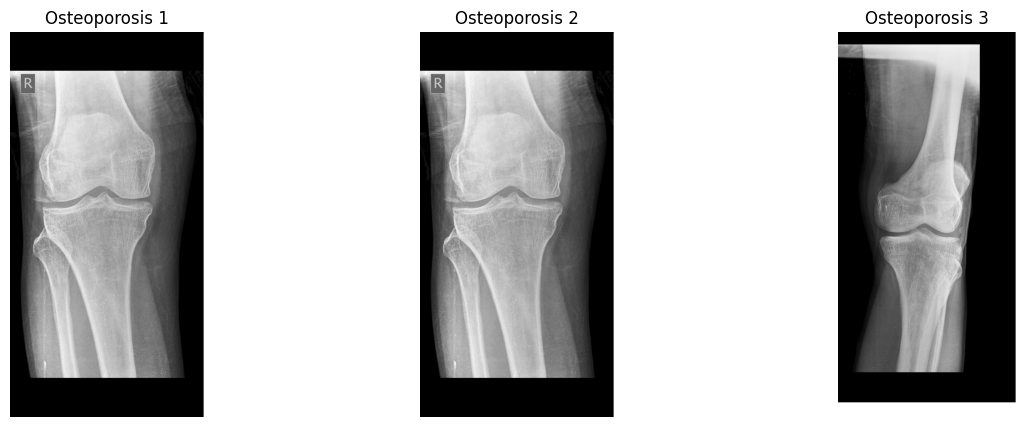

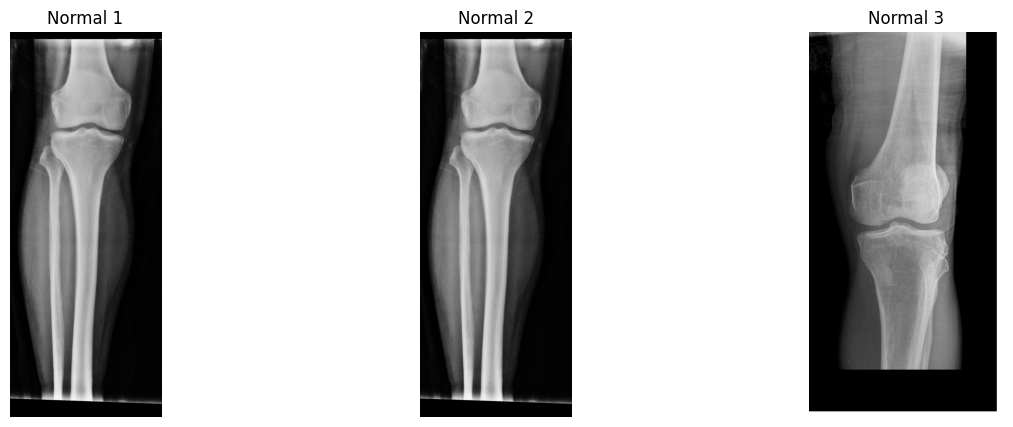

In [10]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Example directory structure
osteo_dir = r'working/1-original-dataset/osteoporosis'
normal_dir = r'working/1-original-dataset/normal'

# Function to load and visualize images
def visualize_images(directory, label, num_images=3):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i, filename in enumerate(os.listdir(directory)[:num_images]):
        image_path = os.path.join(directory, filename)
        image = Image.open(image_path)
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f'{label} {i+1}')
        axes[i].axis('off')
    plt.show()

# Visualize sample images from each class
visualize_images(osteo_dir, 'Osteoporosis')
visualize_images(normal_dir, 'Normal')

### - Visualize Images by openCV

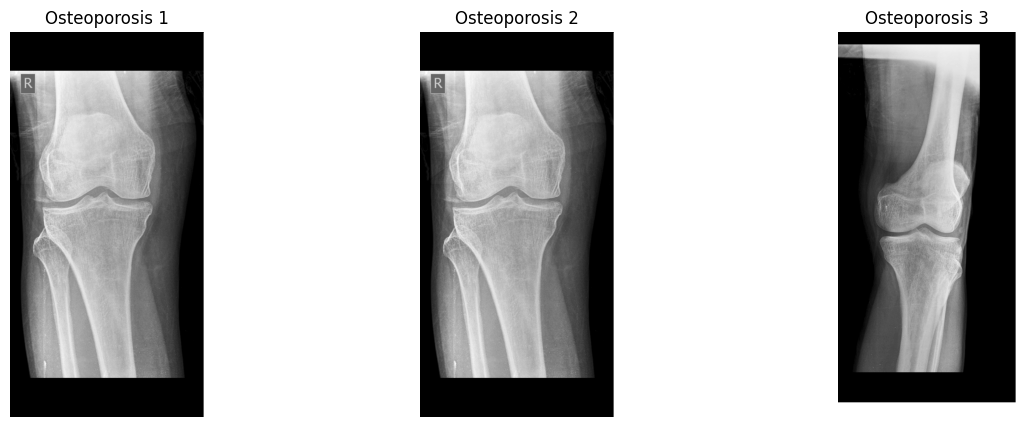

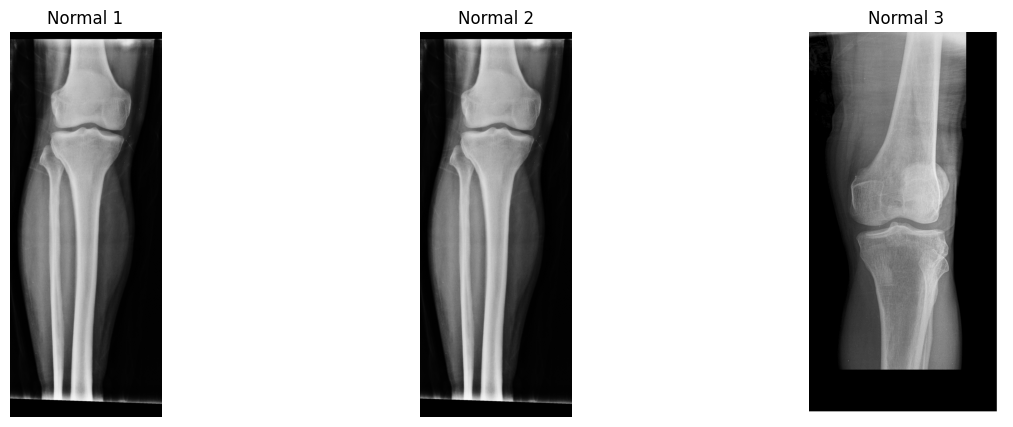

In [11]:
import cv2
import matplotlib.pyplot as plt
import os

# Example directory structure
osteo_dir = r'working/1-original-dataset/osteoporosis'
normal_dir = r'working/1-original-dataset/normal'

# Function to load and visualize images using OpenCV
def visualize_images_cv2(directory, label, num_images=3):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i, filename in enumerate(os.listdir(directory)[:num_images]):
        image_path = os.path.join(directory, filename)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f'{label} {i+1}')
        axes[i].axis('off')
    plt.show()

# Visualize sample images from each class using OpenCV
visualize_images_cv2(osteo_dir, 'Osteoporosis')
visualize_images_cv2(normal_dir, 'Normal')


### - Histogram of Pixel Intensities

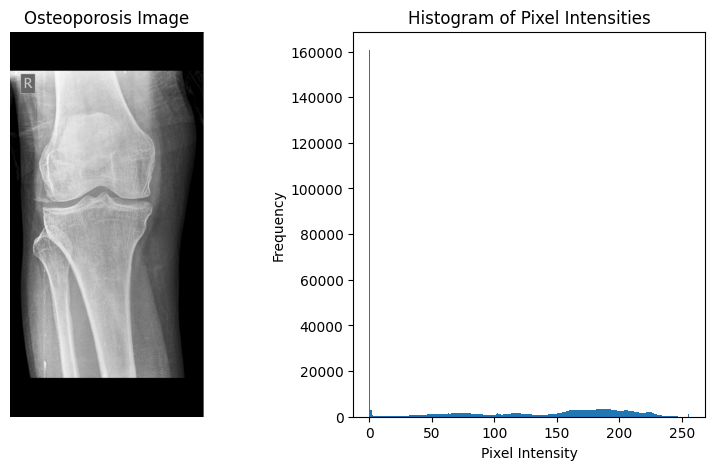

In [12]:
import cv2
import matplotlib.pyplot as plt
import os

# Example directory structure
osteo_dir = r'working/1-original-dataset/osteoporosis'

# Load an image using OpenCV
image_path = os.path.join(osteo_dir, os.listdir(osteo_dir)[0])
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Plot the image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Osteoporosis Image')
plt.axis('off')

# Plot histogram of pixel intensities
plt.subplot(1, 2, 2)
plt.hist(image.ravel(), bins=256, range=[0, 256])
plt.title('Histogram of Pixel Intensities')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


## 4. PreProcess Images

### - Image Pixel-Histogram Equalization

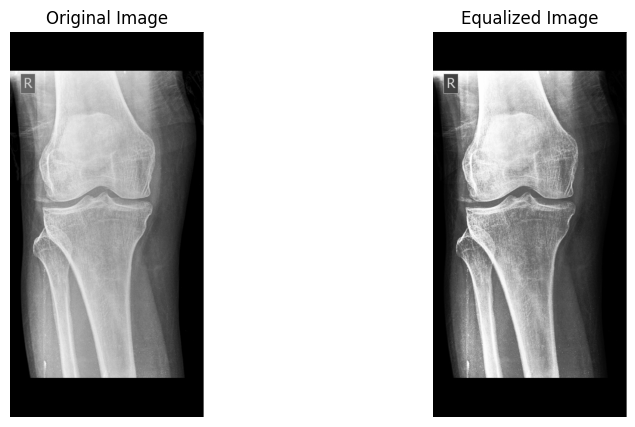

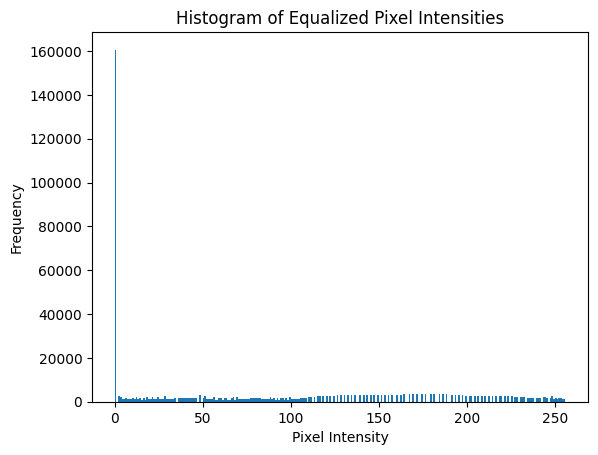

In [13]:
import cv2
import matplotlib.pyplot as plt
import os

# Example directory structure
osteo_dir = r'working/1-original-dataset/osteoporosis'

# Load an image using OpenCV
image_path = os.path.join(osteo_dir, os.listdir(osteo_dir)[0])
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized_image = cv2.equalizeHist(image)

# Plot the original and equalized images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.show()

# Plot histogram of pixel intensities for the equalized image
plt.figure()
plt.hist(equalized_image.ravel(), bins=256, range=[0, 256])
plt.title('Histogram of Equalized Pixel Intensities')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


### - CLAHE

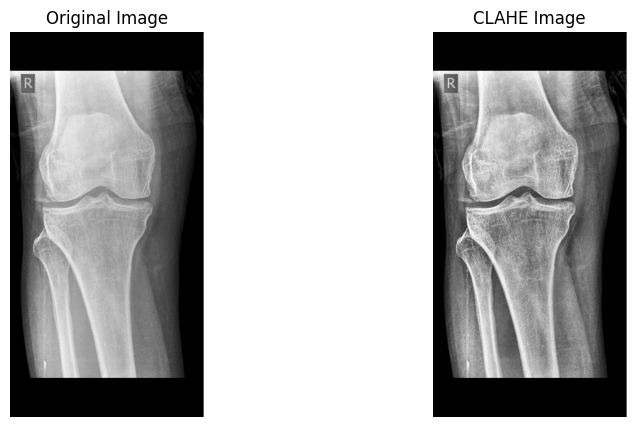

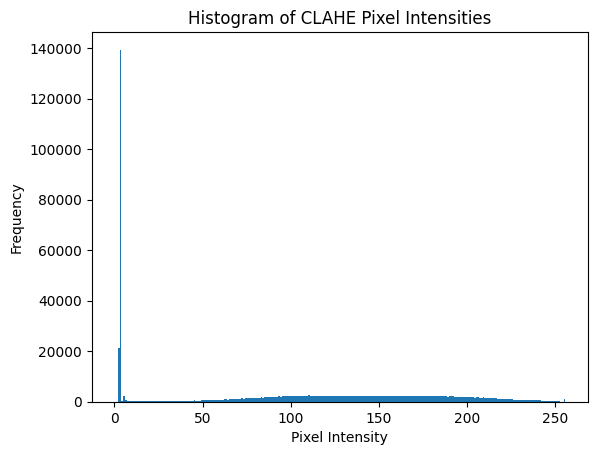

In [14]:
# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(image)

# Plot the original and CLAHE images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(clahe_image, cmap='gray')
plt.title('CLAHE Image')
plt.axis('off')

plt.show()

# Plot histogram of pixel intensities for the CLAHE image
plt.figure()
plt.hist(clahe_image.ravel(), bins=256, range=[0, 256])
plt.title('Histogram of CLAHE Pixel Intensities')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


### - Cropping Images

#### - TOO MILD Cropping

In [15]:
import cv2
import numpy as np

def crop_black_boundaries(image):
    # Convert to grayscale if the image is not already in grayscale
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image

    # Invert the grayscale image
    inverted = cv2.bitwise_not(gray)

    # Find all non-zero points (text) in the image
    coords = cv2.findNonZero(inverted)

    # Get the bounding box of the non-zero regions
    x, y, w, h = cv2.boundingRect(coords)

    # Crop the image to the bounding box
    cropped_image = image[y:y+h, x:x+w]

    return cropped_image


In [16]:
import os
from tqdm import tqdm

# Directory paths
osteo_dir = r'working/1-original-dataset/osteoporosis'
normal_dir = r'working/1-original-dataset/normal'

# Function to load, crop, and save images
def process_and_save_images(input_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for filename in tqdm(os.listdir(input_dir)):
        if filename.endswith('.png') or filename.endswith('.jpg'):
            image_path = os.path.join(input_dir, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            cropped_image = crop_black_boundaries(image)
            cv2.imwrite(os.path.join(output_dir, filename), cropped_image)

# Process and save cropped images
process_and_save_images(osteo_dir, 'working/2-processed-dataset/osteoporosis')
process_and_save_images(normal_dir, 'working/2-processed-dataset/normal')


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 31.90it/s]


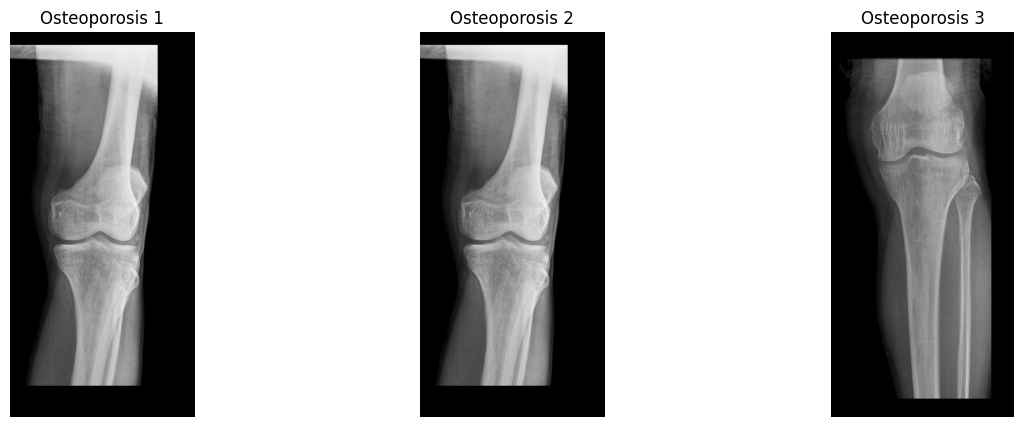

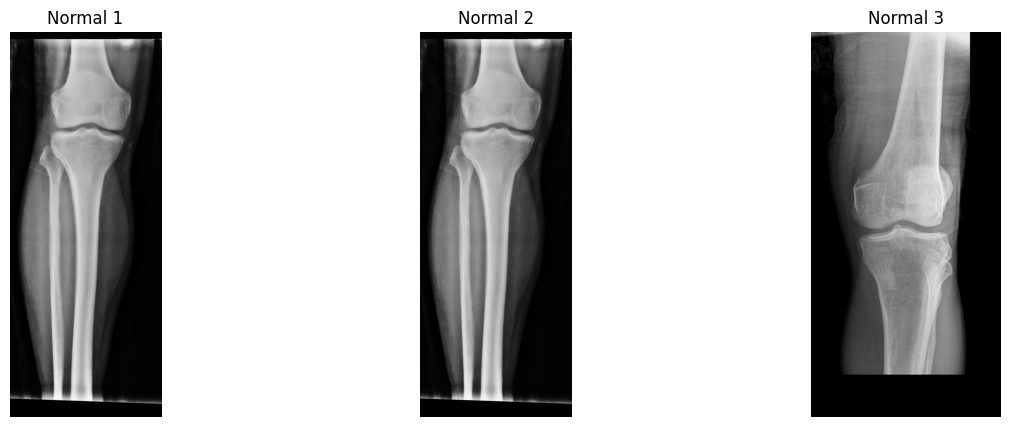

In [17]:
import cv2
import matplotlib.pyplot as plt
import os

# Example directory structure
osteo_dir = r'working/2-processed-dataset/osteoporosis'
normal_dir = r'working/2-processed-dataset/normal'

# Function to load and visualize images using OpenCV
def visualize_images_cv2(directory, label, num_images=3):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i, filename in enumerate(os.listdir(directory)[:num_images]):
        image_path = os.path.join(directory, filename)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f'{label} {i+1}')
        axes[i].axis('off')
    plt.show()

# Visualize sample images from each class using OpenCV
visualize_images_cv2(osteo_dir, 'Osteoporosis')
visualize_images_cv2(normal_dir, 'Normal')

#### - TOO AGGRESSIVE Cropping

In [18]:
import cv2
import numpy as np
import os
from tqdm import tqdm

def crop_black_boundaries(image):
    # Convert to grayscale
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image

    # Apply adaptive thresholding
    _, thresh = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Get the bounding box of the largest contour
    if contours:
        x, y, w, h = cv2.boundingRect(contours[0])
        cropped_image = image[y:y+h, x:x+w]
        return cropped_image
    else:
        return image  # If no contours found, return the original image

def process_and_save_images(input_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for filename in tqdm(os.listdir(input_dir)):
        if filename.endswith('.png') or filename.endswith('.jpg'):
            image_path = os.path.join(input_dir, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            cropped_image = crop_black_boundaries(image)
            cv2.imwrite(os.path.join(output_dir, filename), cropped_image)

# Directory paths
osteo_dir = r'working/1-original-dataset/osteoporosis'
normal_dir = r'working/1-original-dataset/normal'

# Process and save cropped images
process_and_save_images(osteo_dir, 'working/2-processed-dataset/osteoporosis')
process_and_save_images(normal_dir, 'working/2-processed-dataset/normal')


100%|█████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 142.86it/s]


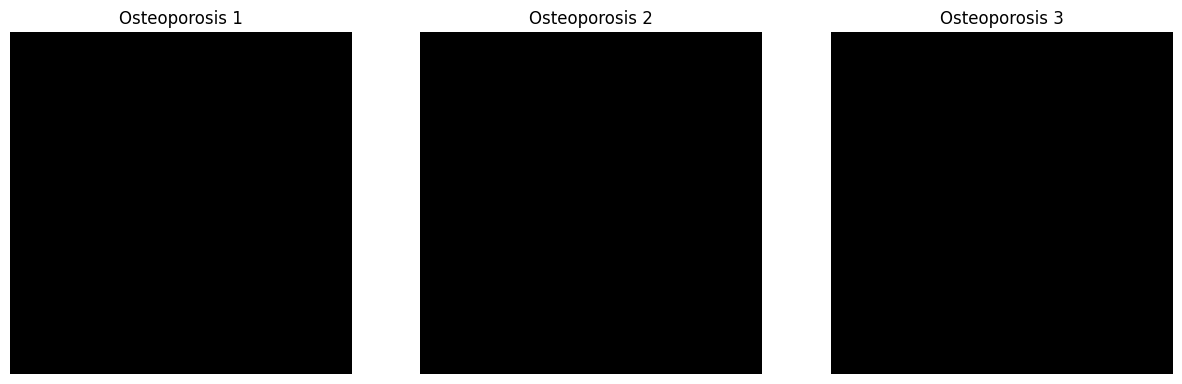

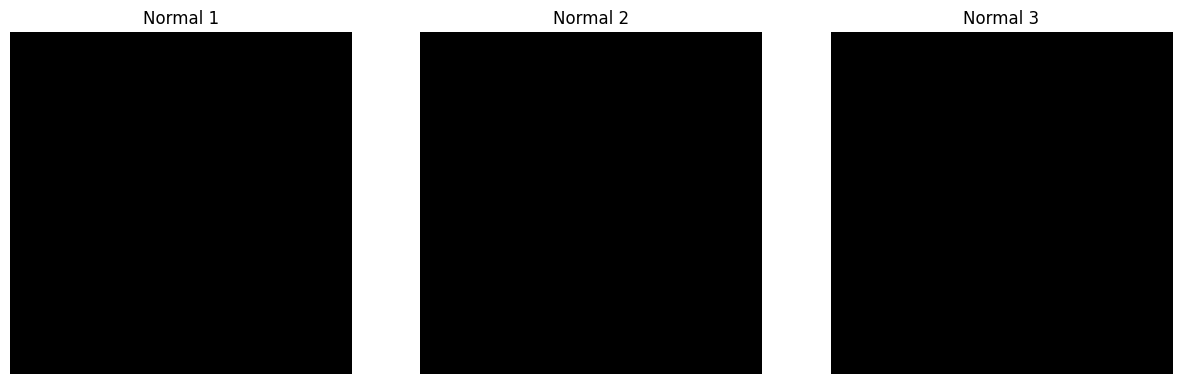

In [19]:
import cv2
import matplotlib.pyplot as plt
import os

# Example directory structure
osteo_dir = r'working/2-processed-dataset/osteoporosis'
normal_dir = r'working/2-processed-dataset/normal'

# Function to load and visualize images using OpenCV
def visualize_images_cv2(directory, label, num_images=3):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i, filename in enumerate(os.listdir(directory)[:num_images]):
        image_path = os.path.join(directory, filename)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f'{label} {i+1}')
        axes[i].axis('off')
    plt.show()

# Visualize sample images from each class using OpenCV
visualize_images_cv2(osteo_dir, 'Osteoporosis')
visualize_images_cv2(normal_dir, 'Normal')

In [20]:
import cv2
import numpy as np
import os
from tqdm import tqdm

def crop_black_boundaries(image, min_area=500):  # Adjust min_area as needed
    # Convert to grayscale if the image is not already in grayscale
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image

    # Apply adaptive thresholding
    _, thresh = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter out contours that are too small
    valid_contours = [c for c in contours if cv2.contourArea(c) > min_area]

    if valid_contours:
        # Get the bounding box of the largest valid contour
        largest_contour = max(valid_contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(largest_contour)
        
        if w * h > min_area:  # Ensure the bounding box is not too small
            cropped_image = image[y:y+h, x:x+w]
            return cropped_image

    # Return the original image if no valid contour is found or the region is too small
    return image

def process_and_save_images(input_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for filename in tqdm(os.listdir(input_dir)):
        if filename.endswith('.png') or filename.endswith('.jpg'):
            image_path = os.path.join(input_dir, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            cropped_image = crop_black_boundaries(image)
            cv2.imwrite(os.path.join(output_dir, filename), cropped_image)

# Directory paths
osteo_dir = r'working/1-original-dataset/osteoporosis'
normal_dir = r'working/1-original-dataset/normal'

# Process and save cropped images
process_and_save_images(osteo_dir, 'working/2-processed-dataset/osteoporosis')
process_and_save_images(normal_dir, 'working/2-processed-dataset/normal')


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 78.95it/s]


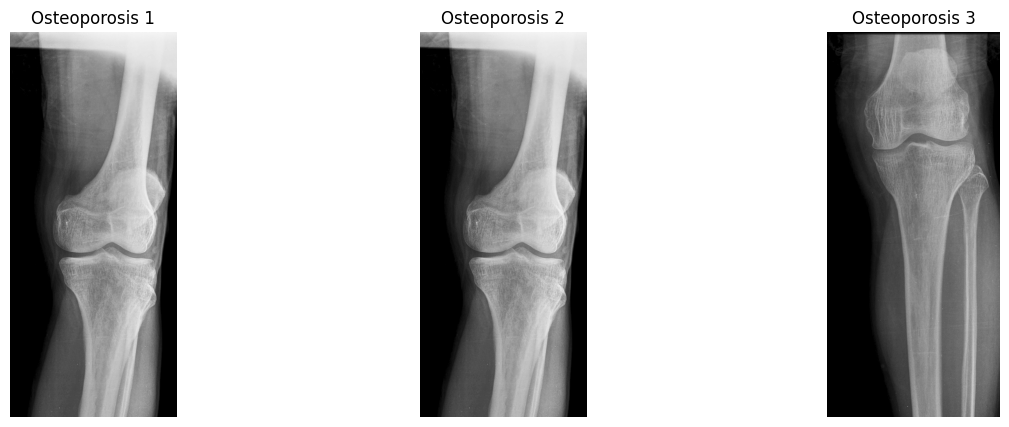

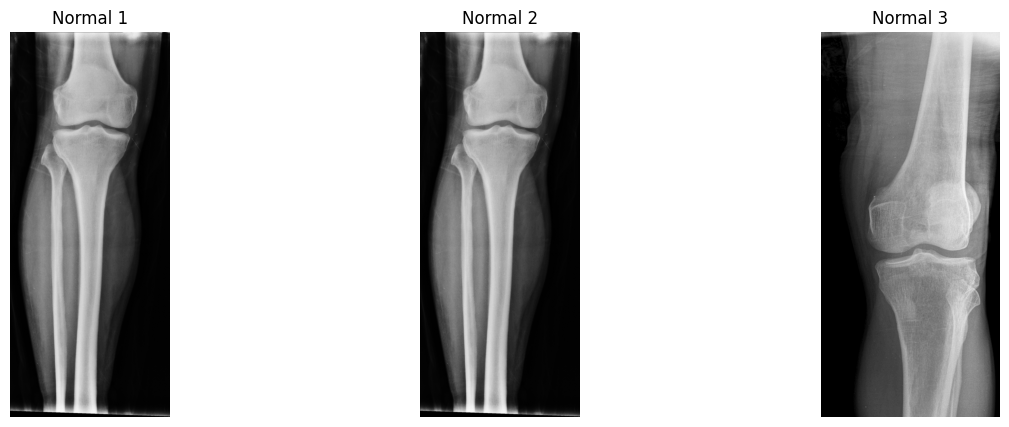

In [21]:
import cv2
import matplotlib.pyplot as plt
import os

# Example directory structure
osteo_dir = r'working/2-processed-dataset/osteoporosis'
normal_dir = r'working/2-processed-dataset/normal'

# Function to load and visualize images using OpenCV
def visualize_images_cv2(directory, label, num_images=3):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i, filename in enumerate(os.listdir(directory)[:num_images]):
        image_path = os.path.join(directory, filename)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f'{label} {i+1}')
        axes[i].axis('off')
    plt.show()

# Visualize sample images from each class using OpenCV
visualize_images_cv2(osteo_dir, 'Osteoporosis')
visualize_images_cv2(normal_dir, 'Normal')

### - Resizing Images 224 x 224

#### - Method 1: Resizing (but AspectRatio Changes) !!!!

In [22]:
import cv2
import os
from tqdm import tqdm

# Define target size
target_size = (224, 224)

# Function to resize images
def resize_image(image, target_size):
    return cv2.resize(image, target_size)

# Function to process and save resized images
def process_and_save_resized_images(input_dir, output_dir, target_size):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for filename in tqdm(os.listdir(input_dir)):
        if filename.endswith('.png') or filename.endswith('.jpg'):
            image_path = os.path.join(input_dir, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            resized_image = resize_image(image, target_size)
            cv2.imwrite(os.path.join(output_dir, filename), resized_image)

# Directory paths
cropped_osteo_dir = 'working/2-processed-dataset/osteoporosis'
cropped_normal_dir = 'working/2-processed-dataset/normal'

# Process and save resized images
process_and_save_resized_images(cropped_osteo_dir, 'working/3-resized-dataset/osteoporosis', target_size)
process_and_save_resized_images(cropped_normal_dir, 'working/3-resized-dataset/normal', target_size)


100%|█████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 136.36it/s]


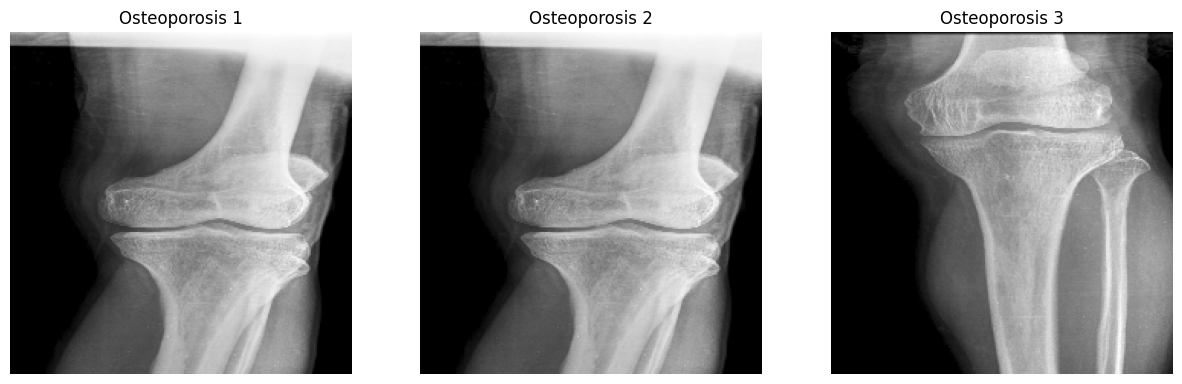

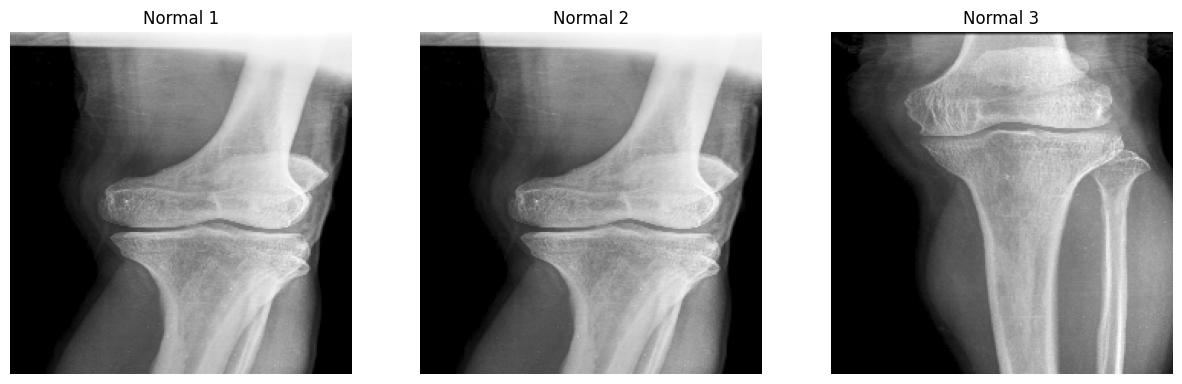

In [23]:
import cv2
import matplotlib.pyplot as plt
import os

# Function to load and visualize images using OpenCV
def visualize_images_cv2(directory, label, num_images=3):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i, filename in enumerate(os.listdir(directory)[:num_images]):
        image_path = os.path.join(directory, filename)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f'{label} {i+1}')
        axes[i].axis('off')
    plt.show()

resized_osteo_dir = 'working/3-resized-dataset/osteoporosis'
resized_normal_dir = 'working/3-resized-dataset/normal'

# Visualize sample images from each class using OpenCV
visualize_images_cv2(resized_osteo_dir, 'Osteoporosis')
visualize_images_cv2(resized_osteo_dir, 'Normal')

In [24]:
import cv2
import os
from tqdm import tqdm

# Function to calculate aspect ratio
def calculate_aspect_ratio(image):
    h, w = image.shape[:2]
    return w / h

# Verify aspect ratios of a few images
def verify_aspect_ratios(original_dir, resized_dir):
    for filename in os.listdir(original_dir)[:5]:  # Check first 5 images for example
        if filename.endswith('.png') or filename.endswith('.jpg'):
            original_image_path = os.path.join(original_dir, filename)
            resized_image_path = os.path.join(resized_dir, filename)
            
            original_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)
            resized_image = cv2.imread(resized_image_path, cv2.IMREAD_GRAYSCALE)
            
            original_aspect_ratio = calculate_aspect_ratio(original_image)
            resized_aspect_ratio = calculate_aspect_ratio(resized_image)
            
            print(f'Image: {filename}')
            print(f'Original Aspect Ratio: {original_aspect_ratio}')
            print(f'Resized Aspect Ratio: {resized_aspect_ratio}\n')

# Directory paths
cropped_osteo_dir = 'working/2-processed-dataset/osteoporosis'
resized_osteo_dir = 'working/3-resized-dataset/osteoporosis'

# Verify aspect ratios
verify_aspect_ratios(cropped_osteo_dir, resized_osteo_dir)


Image: 3.png
Original Aspect Ratio: 0.43119266055045874
Resized Aspect Ratio: 1.0

Image: 3_1.png
Original Aspect Ratio: 0.43119266055045874
Resized Aspect Ratio: 1.0

Image: 4.png
Original Aspect Ratio: 0.4484304932735426
Resized Aspect Ratio: 1.0

Image: 4_1.png
Original Aspect Ratio: 0.4484304932735426
Resized Aspect Ratio: 1.0

Image: Osteoporosis.jpg
Original Aspect Ratio: 0.5
Resized Aspect Ratio: 1.0



#### - Method 2: Resizing with Padding (so AR does not change !!!!)

In [25]:
import cv2
import numpy as np
import os
from tqdm import tqdm

def resize_with_padding(image, target_size):
    h, w = image.shape[:2]
    aspect_ratio = w / h
    
    # Determine the new size while preserving the aspect ratio
    if aspect_ratio > 1:
        new_w = target_size[0]
        new_h = int(new_w / aspect_ratio)
    else:
        new_h = target_size[1]
        new_w = int(new_h * aspect_ratio)
    
    # Resize the image while maintaining the aspect ratio
    resized_image = cv2.resize(image, (new_w, new_h))
    
    # Create a new image of the target size with a black background
    padded_image = np.zeros((target_size[1], target_size[0]), dtype=np.uint8)
    
    # Calculate padding values
    x_offset = (target_size[0] - new_w) // 2
    y_offset = (target_size[1] - new_h) // 2
    
    # Insert the resized image into the padded image
    padded_image[y_offset:y_offset+new_h, x_offset:x_offset+new_w] = resized_image
    
    return padded_image

# Function to process and save padded images
def process_and_save_padded_images(input_dir, output_dir, target_size):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for filename in tqdm(os.listdir(input_dir)):
        if filename.endswith('.png') or filename.endswith('.jpg'):
            image_path = os.path.join(input_dir, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            padded_image = resize_with_padding(image, target_size)
            cv2.imwrite(os.path.join(output_dir, filename), padded_image)

# Directory paths
cropped_osteo_dir = 'working/2-processed-dataset/osteoporosis'
cropped_normal_dir = 'working/2-processed-dataset/normal'

# Define target size
target_size = (224, 224)

# Process and save padded images
process_and_save_padded_images(cropped_osteo_dir, 'working/4-padded-dataset/osteoporosis', target_size)
process_and_save_padded_images(cropped_normal_dir, 'working/4-padded-dataset/normal', target_size)


100%|█████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 187.50it/s]


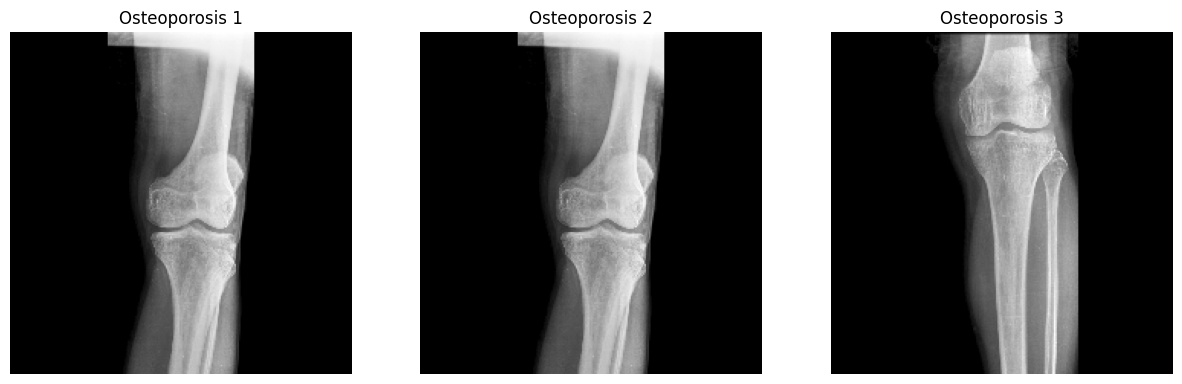

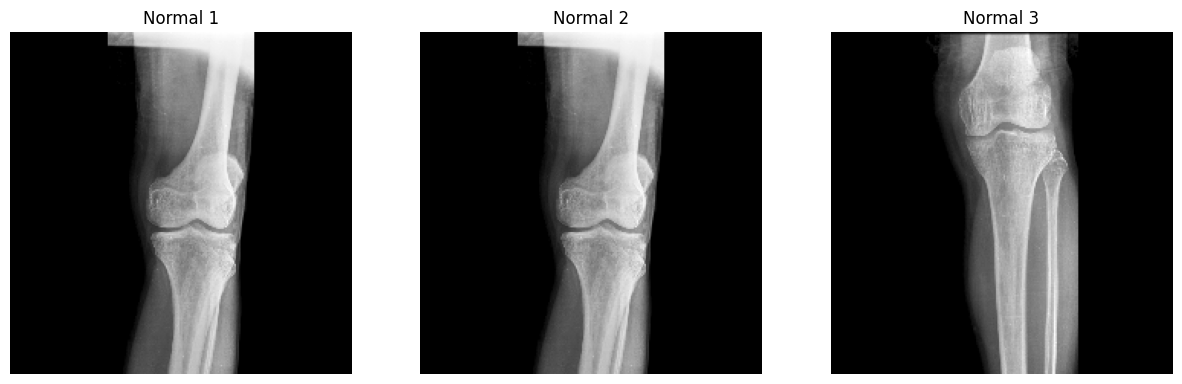

In [26]:
import cv2
import matplotlib.pyplot as plt
import os

# Function to load and visualize images using OpenCV
def visualize_images_cv2(directory, label, num_images=3):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i, filename in enumerate(os.listdir(directory)[:num_images]):
        image_path = os.path.join(directory, filename)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f'{label} {i+1}')
        axes[i].axis('off')
    plt.show()

padded_osteo_dir = 'working/4-padded-dataset/osteoporosis'
padded_normal_dir = 'working/4-padded-dataset/normal'

# Visualize sample images from each class using OpenCV
visualize_images_cv2(padded_osteo_dir, 'Osteoporosis')
visualize_images_cv2(padded_osteo_dir, 'Normal')

In [27]:
import cv2
import os
from tqdm import tqdm

# Function to calculate aspect ratio
def calculate_aspect_ratio(image):
    h, w = image.shape[:2]
    return w / h

# Verify aspect ratios of a few images
def verify_aspect_ratios(original_dir, padded_dir):
    for filename in os.listdir(original_dir)[:5]:  # Check first 5 images for example
        if filename.endswith('.png') or filename.endswith('.jpg'):
            original_image_path = os.path.join(original_dir, filename)
            padded_image_path = os.path.join(padded_dir, filename)
            
            original_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)
            padded_image = cv2.imread(padded_image_path, cv2.IMREAD_GRAYSCALE)
            
            original_aspect_ratio = calculate_aspect_ratio(original_image)
            padded_aspect_ratio = calculate_aspect_ratio(padded_image)
            
            print(f'Image: {filename}')
            print(f'Original Aspect Ratio: {original_aspect_ratio}')
            print(f'Padded Aspect Ratio: {padded_aspect_ratio}\n')

# Directory paths
cropped_osteo_dir = 'working/2-processed-dataset/osteoporosis'
padded_osteo_dir  = 'working/4-padded-dataset/osteoporosis'

# Verify aspect ratios
verify_aspect_ratios(cropped_osteo_dir, padded_osteo_dir)


Image: 3.png
Original Aspect Ratio: 0.43119266055045874
Padded Aspect Ratio: 1.0

Image: 3_1.png
Original Aspect Ratio: 0.43119266055045874
Padded Aspect Ratio: 1.0

Image: 4.png
Original Aspect Ratio: 0.4484304932735426
Padded Aspect Ratio: 1.0

Image: 4_1.png
Original Aspect Ratio: 0.4484304932735426
Padded Aspect Ratio: 1.0

Image: Osteoporosis.jpg
Original Aspect Ratio: 0.5
Padded Aspect Ratio: 1.0



### - Normalization

In [28]:
import cv2
import numpy as np
import os
from tqdm import tqdm

def normalize_image(image):
    return image / 255.0

def process_and_normalize_images(input_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for filename in tqdm(os.listdir(input_dir)):
        if filename.endswith('.png') or filename.endswith('.jpg'):
            image_path = os.path.join(input_dir, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            normalized_image = normalize_image(image)
            normalized_image = (normalized_image * 255).astype(np.uint8)
            cv2.imwrite(os.path.join(output_dir, filename), normalized_image)

# Directory paths
padded_osteo_dir = 'working/4-padded-dataset/osteoporosis'
padded_normal_dir = 'working/4-padded-dataset/normal'

# Process and normalize images
process_and_normalize_images(padded_osteo_dir, 'working/5-normalized-dataset/osteoporosis')
process_and_normalize_images(padded_normal_dir, 'working/5-normalized-dataset/normal')


100%|█████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 272.56it/s]


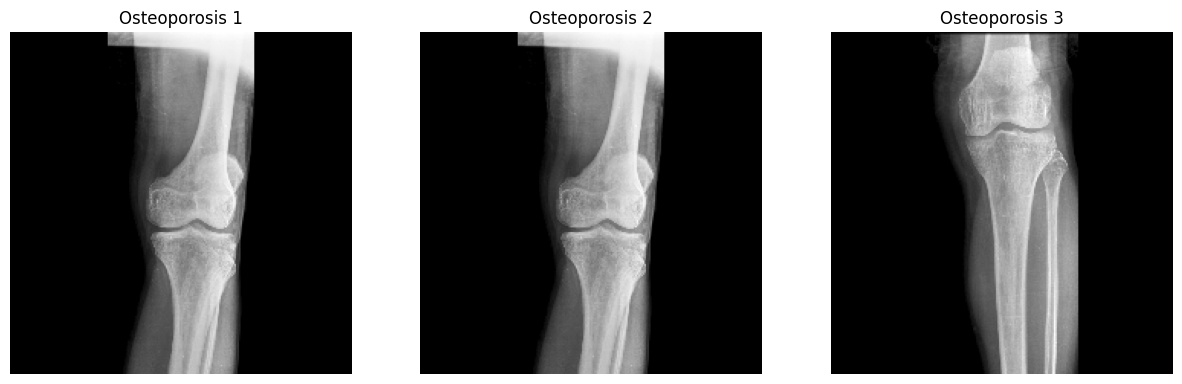

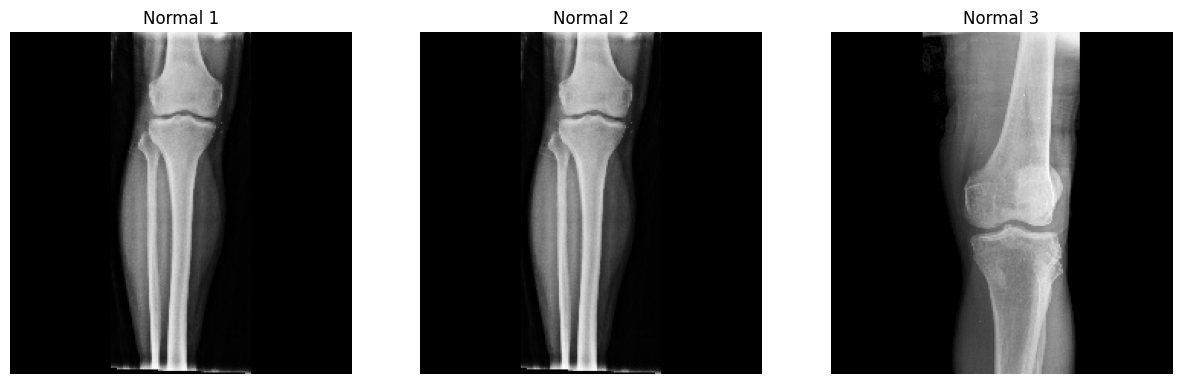

In [29]:
normalized_osteo_dir = 'working/5-normalized-dataset/osteoporosis'
normalized_normal_dir = 'working/5-normalized-dataset/normal'


# Visualize sample images from each class using OpenCV
visualize_images_cv2(normalized_osteo_dir, 'Osteoporosis')
visualize_images_cv2(normalized_normal_dir, 'Normal')

#### - Checking Normalization

Pixel values (sample): [0 0 0 0 0 0 0 0 0 0]


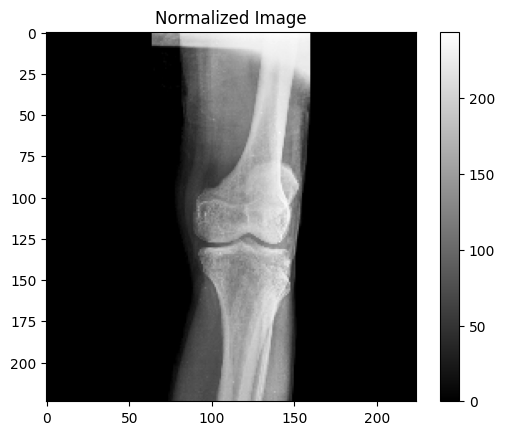

In [30]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# Load a normalized image
normalized_image_path = 'working/5-normalized-dataset/osteoporosis/3.png'
normalized_image = cv2.imread(normalized_image_path, cv2.IMREAD_GRAYSCALE)

# Check pixel values
print("Pixel values (sample):", normalized_image.ravel()[:10])

# Visualize the normalized image
plt.imshow(normalized_image, cmap='gray')
plt.title('Normalized Image')
plt.colorbar()
plt.show()


Tensor values (sample): [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]


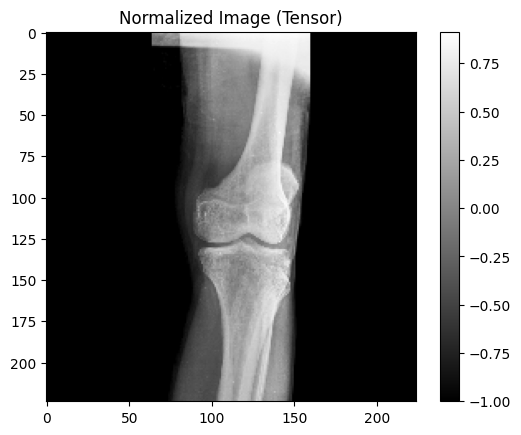

In [31]:
import torch
from torchvision import transforms
from PIL import Image

# Define a transform to normalize the image
normalize_transform = transforms.Compose([
    transforms.ToTensor(),  # Converts the image to a tensor
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalizes pixel values to [-1, 1]
])

# Load an image using PIL
image_path = 'working/5-normalized-dataset/osteoporosis/3.png'
image = Image.open(image_path).convert('L')  # Convert to grayscale

# Apply the transform to normalize the image
normalized_tensor = normalize_transform(image)

# Check tensor values
print("Tensor values (sample):", normalized_tensor.numpy().ravel()[:10])

# Visualize the normalized image
plt.imshow(normalized_tensor.numpy().squeeze(), cmap='gray')
plt.title('Normalized Image (Tensor)')
plt.colorbar()
plt.show()


Normalized pixel values (sample): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


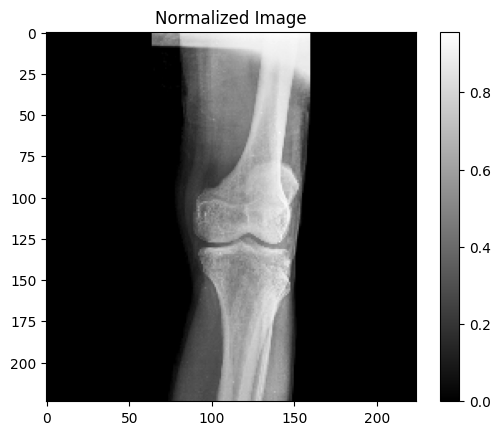

In [32]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# Function to normalize images
def normalize_image(image):
    return image / 255.0

# Load and normalize an image
image_path = 'working/4-padded-dataset/osteoporosis/3.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
normalized_image = normalize_image(image)

# Check pixel values
print("Normalized pixel values (sample):", normalized_image.ravel()[:10])

# Visualize the normalized image
plt.imshow(normalized_image, cmap='gray')
plt.title('Normalized Image')
plt.colorbar()
plt.show()


Normalized pixel values (sample): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


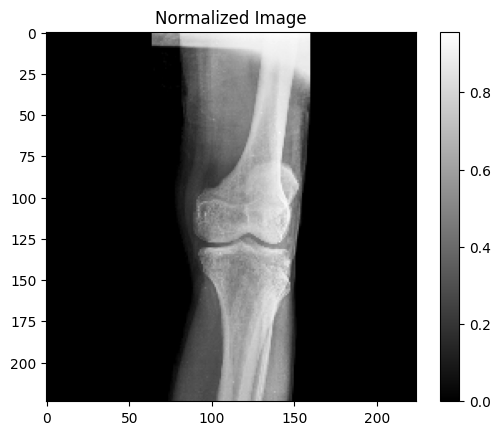

In [33]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# Function to normalize images
def normalize_image(image):
    return image / 255.0

# Load and normalize an image
image_path = 'working/4-padded-dataset/osteoporosis/3.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
normalized_image = normalize_image(image)

# Check pixel values
print("Normalized pixel values (sample):", normalized_image.ravel()[:10])

# Visualize the normalized image
plt.imshow(normalized_image, cmap='gray')
plt.title('Normalized Image')
plt.colorbar()
plt.show()


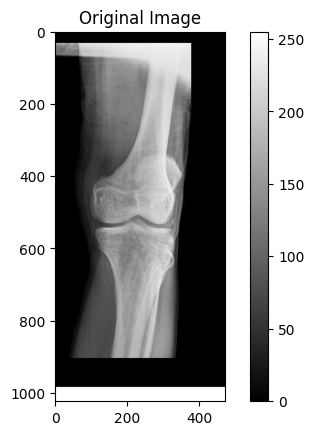

Original pixel values (sample): [0 0 0 0 0 0 0 0 0 0]


In [34]:
import cv2
import matplotlib.pyplot as plt

# Load and visualize the original image
original_image_path = 'working/1-original-dataset/osteoporosis/3.png'
original_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.colorbar()
plt.show()

# Check pixel values of the original image
print("Original pixel values (sample):", original_image.ravel()[:10])


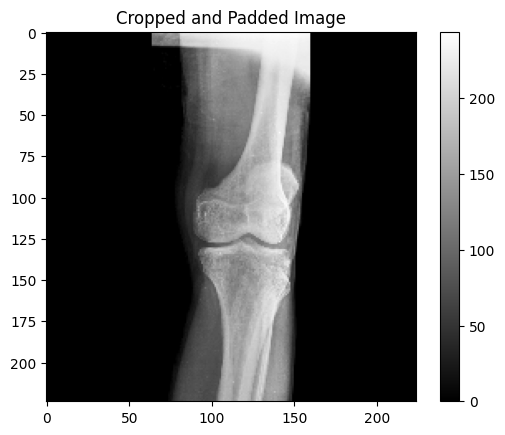

In [35]:
import cv2
import numpy as np

def crop_black_boundaries(image, min_area=500):
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image

    _, thresh = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    valid_contours = [c for c in contours if cv2.contourArea(c) > min_area]

    if valid_contours:
        largest_contour = max(valid_contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(largest_contour)
        if w * h > min_area:
            cropped_image = image[y:y+h, x:x+w]
            return cropped_image

    return image

def resize_with_padding(image, target_size):
    h, w = image.shape[:2]
    aspect_ratio = w / h
    
    if aspect_ratio > 1:
        new_w = target_size[0]
        new_h = int(new_w / aspect_ratio)
    else:
        new_h = target_size[1]
        new_w = int(new_h * aspect_ratio)
    
    resized_image = cv2.resize(image, (new_w, new_h))
    padded_image = np.zeros((target_size[1], target_size[0]), dtype=np.uint8)
    x_offset = (target_size[0] - new_w) // 2
    y_offset = (target_size[1] - new_h) // 2
    padded_image[y_offset:y_offset+new_h, x_offset:x_offset+new_w] = resized_image
    
    return padded_image

# Apply cropping and padding
cropped_image = crop_black_boundaries(original_image)
padded_image = resize_with_padding(cropped_image, (224, 224))

# Visualize cropped and padded image
plt.imshow(padded_image, cmap='gray')
plt.title('Cropped and Padded Image')
plt.colorbar()
plt.show()


Normalized pixel values (sample): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


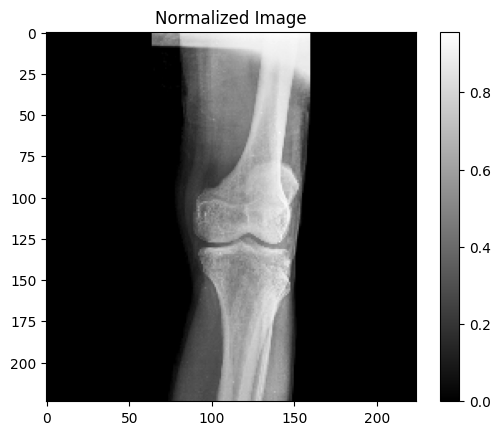

In [36]:
# Normalize the padded image
normalized_image = padded_image / 255.0

# Check normalized pixel values
print("Normalized pixel values (sample):", normalized_image.ravel()[:10])

# Visualize the normalized image
plt.imshow(normalized_image, cmap='gray')
plt.title('Normalized Image')
plt.colorbar()
plt.show()


Total pixels: 50176
Zero pixels: 33457
Non-zero pixels: 16719
Percentage of zero pixels: 66.68%


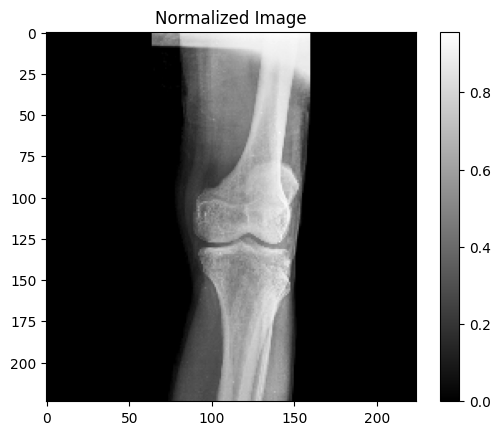

In [37]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Load and normalize an image
image_path = 'working/4-padded-dataset/osteoporosis/3.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
normalized_image = image / 255.0

# Count the number of zero pixels and non-zero pixels
total_pixels = normalized_image.size
zero_pixels = np.sum(normalized_image == 0)
non_zero_pixels = total_pixels - zero_pixels

# Calculate the percentage of zero pixels
zero_pixel_percentage = (zero_pixels / total_pixels) * 100

# Print the results
print(f'Total pixels: {total_pixels}')
print(f'Zero pixels: {zero_pixels}')
print(f'Non-zero pixels: {non_zero_pixels}')
print(f'Percentage of zero pixels: {zero_pixel_percentage:.2f}%')

# Visualize the normalized image
plt.imshow(normalized_image, cmap='gray')
plt.title('Normalized Image')
plt.colorbar()
plt.show()


In [38]:
import cv2
import numpy as np

def scale_up_and_crop(image, scale_factor=1.2, target_size=(224, 224)):
    # Get original dimensions
    h, w = image.shape[:2]

    # Scale up the image
    new_h, new_w = int(h * scale_factor), int(w * scale_factor)
    scaled_image = cv2.resize(image, (new_w, new_h))

    # Calculate the center crop
    start_x = (new_w - target_size[0]) // 2
    start_y = (new_h - target_size[1]) // 2

    cropped_image = scaled_image[start_y:start_y + target_size[1], start_x:start_x + target_size[0]]

    return cropped_image


In [39]:
def calculate_zero_pixel_percentage(image):
    total_pixels = image.size
    zero_pixels = np.sum(image == 0)
    zero_pixel_percentage = (zero_pixels / total_pixels) * 100
    return zero_pixel_percentage

In [40]:
import os
from tqdm import tqdm

def process_images_with_scaling(input_dir, output_dir, target_size, scale_factor=1.2, threshold_percentage=50):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for filename in tqdm(os.listdir(input_dir)):
        if filename.endswith('.png') or filename.endswith('.jpg'):
            image_path = os.path.join(input_dir, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            zero_pixel_percentage = calculate_zero_pixel_percentage(image)
            if zero_pixel_percentage > threshold_percentage:
                # Scale up and crop the image
                scaled_image = scale_up_and_crop(image, scale_factor, target_size)
                cv2.imwrite(os.path.join(output_dir, filename), scaled_image)
            else:
                # Directly resize the image if black boundaries are not excessive
                resized_image = resize_with_padding(image, target_size)
                cv2.imwrite(os.path.join(output_dir, filename), resized_image)

# Directory paths
padded_osteo_dir = 'working/4-padded-dataset/osteoporosis'
padded_normal_dir = 'working/4-padded-dataset/normal'

# Process and save images with scaling and cropping
process_images_with_scaling(cropped_osteo_dir, 'working/6-final-dataset/osteoporosis', (224, 224))
process_images_with_scaling(cropped_normal_dir, 'working/6-final-dataset/normal', (224, 224))


100%|█████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 200.00it/s]


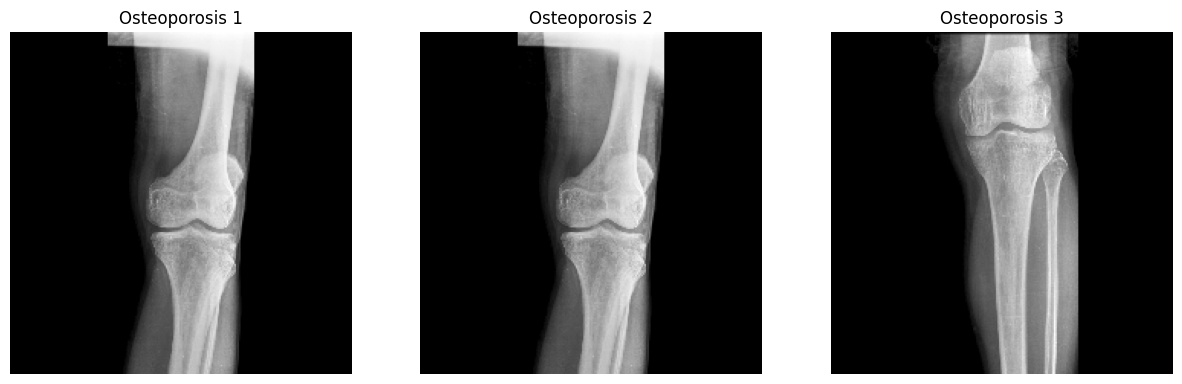

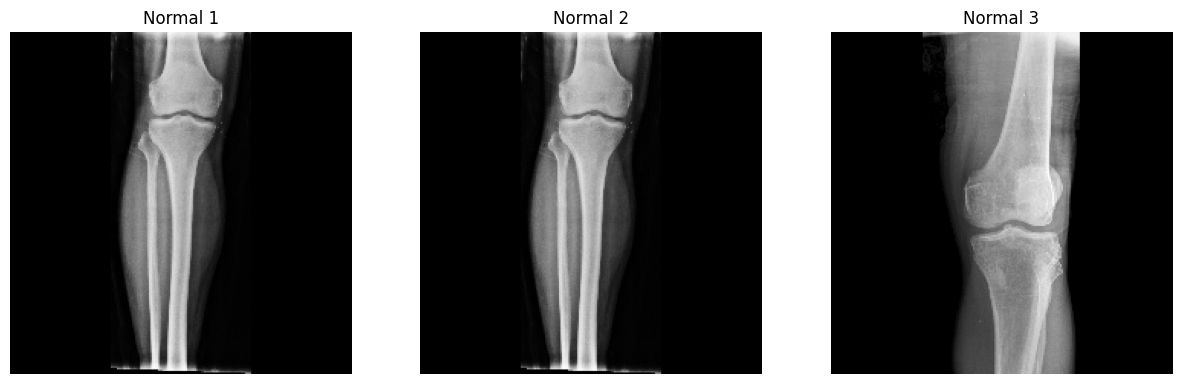

In [41]:
final_osteo_dir = 'working/6-final-dataset/osteoporosis'
final_normal_dir = 'working/6-final-dataset/normal'


# Visualize sample images from each class using OpenCV
visualize_images_cv2(final_osteo_dir, 'Osteoporosis')
visualize_images_cv2(final_normal_dir, 'Normal')

### - Data Augmentation

In [42]:
from torchvision import transforms
from PIL import Image
import os

# Define augmentation transforms
data_augmentation = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.ToTensor()
])


In [43]:
def augment_and_save_images(input_dir, output_dir, num_augmented_copies=5):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    for filename in tqdm(os.listdir(input_dir)):
        if filename.endswith('.png') or filename.endswith('.jpg'):
            image_path = os.path.join(input_dir, filename)
            image = Image.open(image_path).convert('L')  # Convert to grayscale
            
            for i in range(num_augmented_copies):
                augmented_image = data_augmentation(image)
                augmented_image = transforms.ToPILImage()(augmented_image)
                augmented_filename = f"{os.path.splitext(filename)[0]}_aug_{i}.png"
                augmented_image.save(os.path.join(output_dir, augmented_filename))

# Directory paths
final_osteo_dir = 'working/6-final-dataset/osteoporosis'
final_normal_dir = 'working/6-final-dataset/normal'

# Apply augmentation and save images
augment_and_save_images(final_osteo_dir, 'working/7-augmented-dataset/osteoporosis')
augment_and_save_images(final_normal_dir, 'working/7-augmented-dataset/normal')


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 28.55it/s]


Normalized pixel values (sample):
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


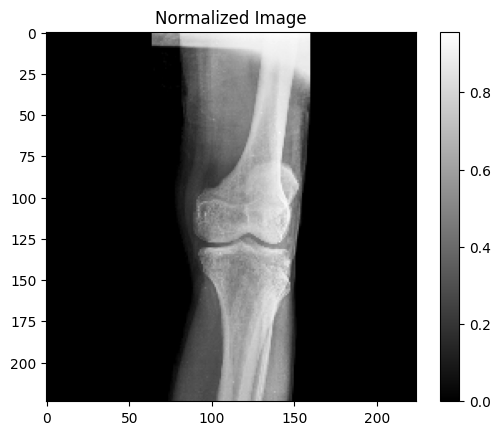

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'working/5-normalized-dataset/osteoporosis/3.png'  # Change to your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Normalize the image
normalized_image = image / 255.0

# Convert to NumPy array (if not already)
normalized_array = np.array(normalized_image)

# Print out some of the pixel values
print("Normalized pixel values (sample):")
print(normalized_array[:10, :10])  # Print the top-left 10x10 corner for example

# Visualize the normalized image
plt.imshow(normalized_array, cmap='gray')
plt.title('Normalized Image')
plt.colorbar()
plt.show()


In [45]:
# Print the shape of the normalized array
print("Shape of normalized array:", normalized_array.shape)

# Print the maximum and minimum values in the normalized array
print("Max value in normalized array:", normalized_array.max())
print("Min value in normalized array:", normalized_array.min())

# Print the mean value in the normalized array
print("Mean value in normalized array:", normalized_array.mean())


Shape of normalized array: (224, 224)
Max value in normalized array: 0.9568627450980393
Min value in normalized array: 0.0
Mean value in normalized array: 0.17485658325830333


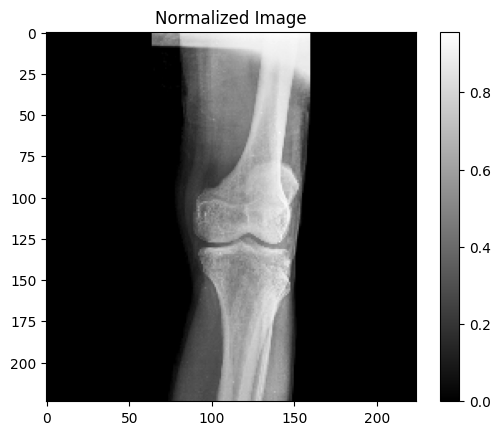

In [46]:
# Visualize the normalized image
plt.imshow(normalized_array, cmap='gray')
plt.title('Normalized Image')
plt.colorbar()
plt.show()

### - Image Segmentation

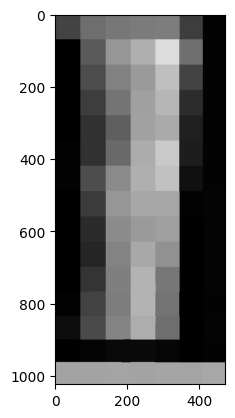

In [47]:
from skimage import segmentation, color
from skimage.future import graph
from skimage.io import imread
import matplotlib.pyplot as plt

# Load an image
image = imread('working/1-original-dataset/osteoporosis/3.png', as_gray=True)

# Apply segmentation (e.g., SLIC superpixels)
segments = segmentation.slic(image, n_segments=100, compactness=10)

# Display the segmented image
fig, ax = plt.subplots()
ax.imshow(color.label2rgb(segments, image, kind='avg'))
plt.show()


 ### - Feature Extraction (Using Pre-trained CNN):

1/1 [==============================] - 0s 220ms/step
(1, 7, 7, 512)


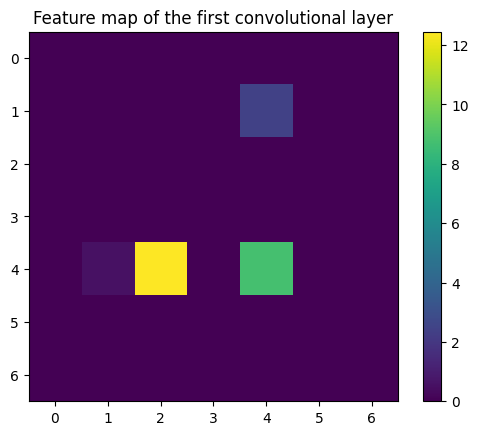

In [48]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt

# Load VGG16 model pre-trained on ImageNet
model = VGG16(weights='imagenet', include_top=False)

# Load an image
img = image.load_img('working/1-original-dataset/osteoporosis/3.png', target_size=(224, 224), color_mode='grayscale')
img_array = image.img_to_array(img)

# Convert the grayscale image to a 3-channel image
img_array = np.repeat(img_array, 3, axis=-1)

# Add a batch dimension
img_array = np.expand_dims(img_array, axis=0)

# Preprocess the image
img_array = preprocess_input(img_array)

# Extract features
features = model.predict(img_array)
print(features.shape)

# Visualize the feature maps of the first convolutional layer
first_conv_layer = features[0, :, :, 0]
plt.imshow(first_conv_layer, cmap='viridis')
plt.colorbar()
plt.title('Feature map of the first convolutional layer')
plt.show()


### - Image Alignment (Using OpenCV for Affine Transformation):

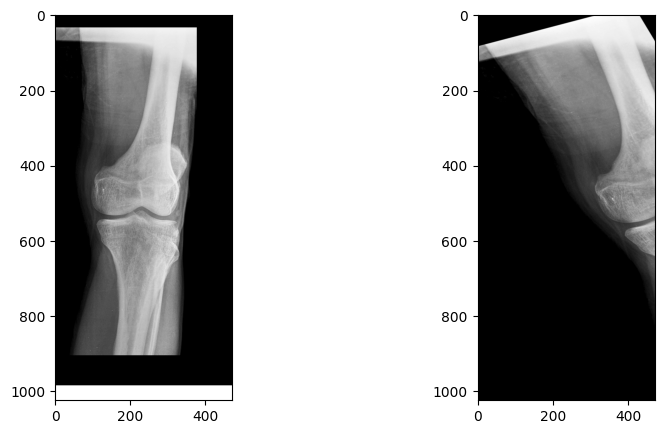

In [49]:
import cv2
import numpy as np

# Load an image
image = cv2.imread('working/1-original-dataset/osteoporosis/3.png', cv2.IMREAD_GRAYSCALE)

# Define source and destination points for alignment
src_pts = np.array([[50, 50], [200, 50], [50, 200]], dtype='float32')
dst_pts = np.array([[10, 100], [200, 50], [100, 250]], dtype='float32')

# Compute the affine transformation matrix
matrix = cv2.getAffineTransform(src_pts, dst_pts)

# Apply the affine transformation
aligned_image = cv2.warpAffine(image, matrix, (image.shape[1], image.shape[0]))

# Plot the original and CLAHE images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(aligned_image, cmap='gray')
plt.show()

In [50]:
imgg = cv2.imread('working/1-original-dataset/osteoporosis/3.png')

In [51]:
from PIL import Image
imgg = Image.open('working/1-original-dataset/osteoporosis/3.png')
imgg.mode

'RGB'

In [52]:
imgg.size

(472, 1024)

In [53]:
from PIL import Image
import numpy as np

# Open the image
imgg = Image.open('working/1-original-dataset/osteoporosis/3.png')

# Check the mode
print("Image Mode:", imgg.mode)  # Should be 'RGB' for a color image

# Check the size (width, height)
print("Image Size:", imgg.size)

# Convert the image to a NumPy array and check the shape
imgg_array = np.array(imgg)
print("Image Array Shape:", imgg_array.shape)


Image Mode: RGB
Image Size: (472, 1024)
Image Array Shape: (1024, 472, 3)


In [54]:
from PIL import Image
import numpy as np

# Open the image
imgg = Image.open('working/1-original-dataset/osteoporosis/3.png')

# Check the mode and size
print("Image Mode:", imgg.mode)  # 'RGB' indicates three channels
print("Image Size:", imgg.size)  # (width, height)

# Convert the image to a NumPy array
imgg_array = np.array(imgg)
print("Image Array Shape:", imgg_array.shape)  # (height, width, channels)

# Check if the image is grayscale but stored in RGB
if imgg.mode == 'RGB' and np.all(imgg_array[:,:,0] == imgg_array[:,:,1]) and np.all(imgg_array[:,:,1] == imgg_array[:,:,2]):
    print("The image is grayscale but stored in RGB mode.")

    # Convert to single-channel grayscale
    grayscale_image = imgg.convert('L')
    grayscale_array = np.array(grayscale_image)
    print("Converted Grayscale Image Array Shape:", grayscale_array.shape)  # (height, width)

    # Save or display the grayscale image as needed
    grayscale_image.save('working/1-original-dataset/osteoporosis/3.png')
    grayscale_image.show()
else:
    print("The image is not strictly grayscale or already in grayscale mode.")


Image Mode: RGB
Image Size: (472, 1024)
Image Array Shape: (1024, 472, 3)
The image is grayscale but stored in RGB mode.
Converted Grayscale Image Array Shape: (1024, 472)


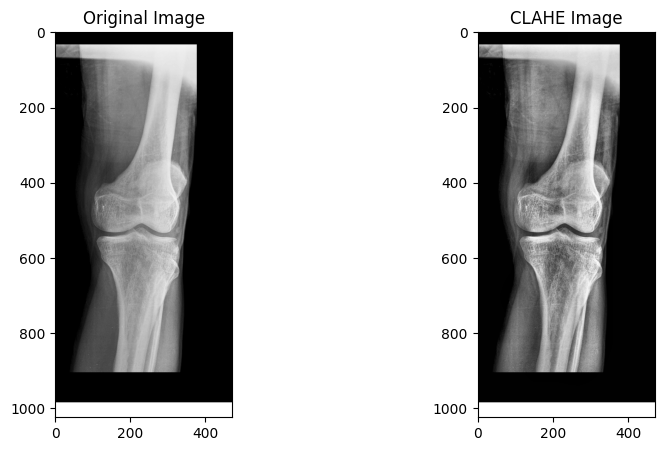

In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'working/1-original-dataset/osteoporosis/3.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(image)

# Display the original and CLAHE images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('CLAHE Image')
plt.imshow(clahe_image, cmap='gray')
plt.show()


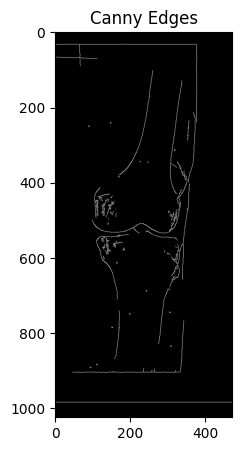

In [56]:
# Apply Canny edge detection
edges = cv2.Canny(image, 100, 200)

# Display the edges
plt.figure(figsize=(5, 5))
plt.title('Canny Edges')
plt.imshow(edges, cmap='gray')
plt.show()


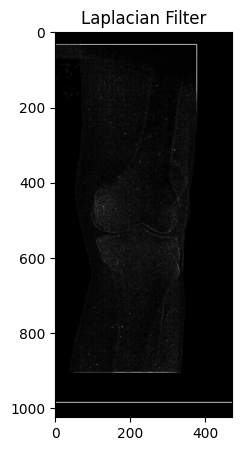

In [57]:
# Apply Laplacian filter
laplacian = cv2.Laplacian(image, cv2.CV_64F)
laplacian = np.uint8(np.absolute(laplacian))

# Display the Laplacian filtered image
plt.figure(figsize=(5, 5))
plt.title('Laplacian Filter')
plt.imshow(laplacian, cmap='gray')
plt.show()


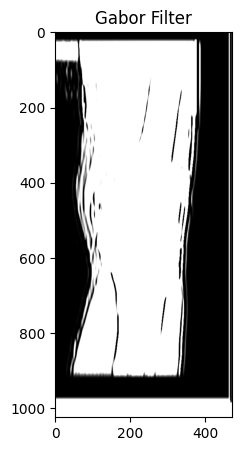

In [58]:
def apply_gabor_filter(image, kernel_size=31, sigma=4.0, theta=0, lamda=10.0, gamma=0.5, psi=0):
    gabor_kernel = cv2.getGaborKernel((kernel_size, kernel_size), sigma, theta, lamda, gamma, psi, ktype=cv2.CV_64F)
    filtered_image = cv2.filter2D(image, cv2.CV_8UC3, gabor_kernel)
    return filtered_image

# Apply Gabor filter
gabor_image = apply_gabor_filter(image)

# Display the Gabor filtered image
plt.figure(figsize=(5, 5))
plt.title('Gabor Filter')
plt.imshow(gabor_image, cmap='gray')
plt.show()


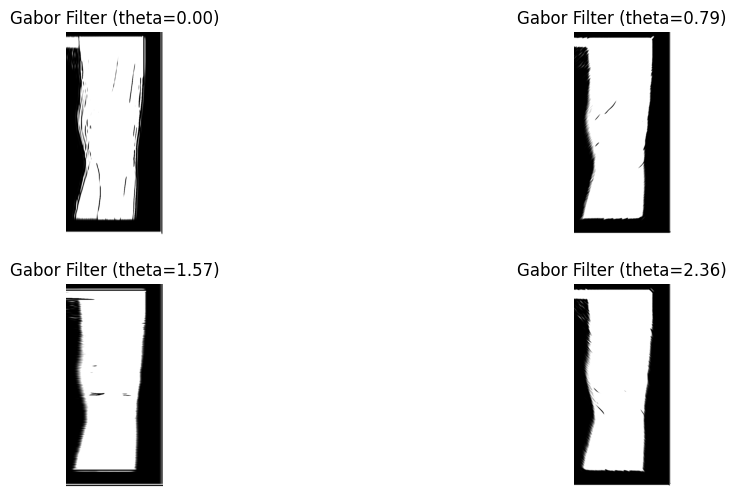

In [59]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_gabor_filter(image, kernel_size=31, sigma=4.0, theta=0, lamda=10.0, gamma=0.5, psi=0):
    gabor_kernel = cv2.getGaborKernel((kernel_size, kernel_size), sigma, theta, lamda, gamma, psi, ktype=cv2.CV_64F)
    filtered_image = cv2.filter2D(image, cv2.CV_8UC3, gabor_kernel)
    return filtered_image

# Load the image
image_path = 'working/1-original-dataset/osteoporosis/3.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define a set of parameters for the Gabor filter
theta_values = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # Different orientations

# Apply Gabor filter with different orientations
plt.figure(figsize=(12, 6))
for i, theta in enumerate(theta_values):
    gabor_image = apply_gabor_filter(image, theta=theta)
    plt.subplot(2, 2, i+1)
    plt.title(f'Gabor Filter (theta={theta:.2f})')
    plt.imshow(gabor_image, cmap='gray')
    plt.axis('off')
plt.show()
